In [6]:
import sys
from pathlib import Path
import numpy as np
from PIL import Image
from dotenv import load_dotenv

# 🔎 Busquem la carpeta arrel del projecte: "potato-dry-matter-optics-ml"
current_path = Path().resolve()
TARGET_ROOT_NAME = "potato-dry-matter-optics-ml"

while current_path.name != TARGET_ROOT_NAME and current_path.parent != current_path:
    current_path = current_path.parent

if current_path.name != TARGET_ROOT_NAME:
    raise RuntimeError(
        f"No s'ha trobat la carpeta '{TARGET_ROOT_NAME}' pujant des del directori actual: {Path().resolve()}"
    )

project_root = current_path
sys.path.append(str(project_root))

# Cargar variables de entorno (ROBOFLOW_API_KEY)
load_dotenv()

# Import del mètode a testejar
from src.raw_image_treatment import potato_defect_classification

print(f"✅ Project root: {project_root}")


✅ Project root: C:\Users\david\Desktop\Uni\potato-dry-matter-optics-ml


In [58]:
# --- Test 1: passant PATH ---------------------------------------------------
IMAGE_REL_PATH = Path("data/input/raw/raw_images/test_1/p2_2.png")
IMAGE_PATH = project_root / IMAGE_REL_PATH

print(f"Processant imatge (PATH): {IMAGE_PATH}")

Processant imatge (PATH): C:\Users\david\Desktop\Uni\potato-dry-matter-optics-ml\data\input\raw\raw_images\test_1\p2_2.png


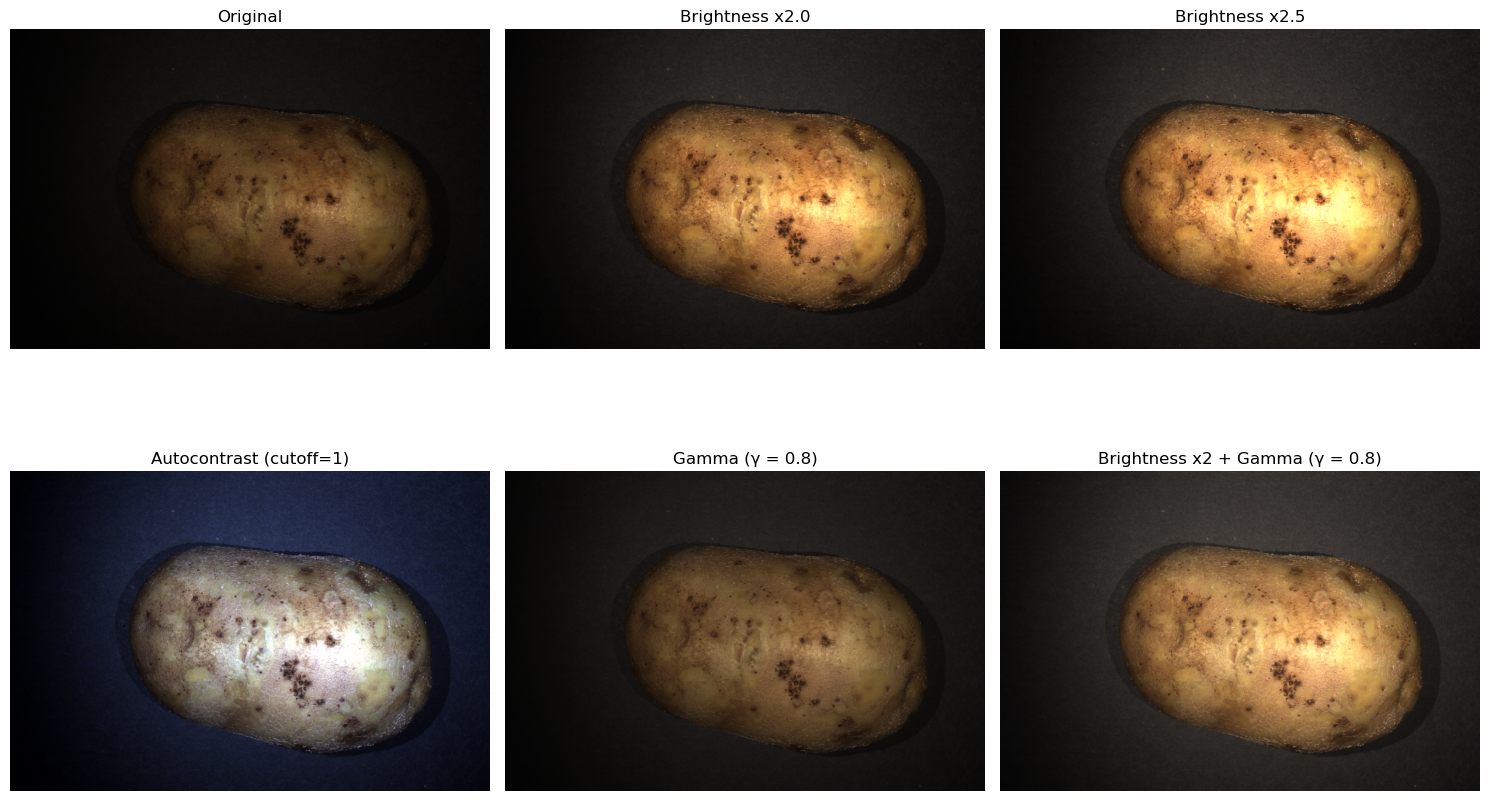

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance, ImageOps

# Imatge original
pil = Image.open(IMAGE_PATH).convert("RGB")

# Opció A: Brightness x2.5
pil_b25 = ImageEnhance.Brightness(pil).enhance(2.5)

# Opció B: Autocontrast
pil_auto = ImageOps.autocontrast(pil, cutoff=1)

# Opció C: Gamma correction
def gamma_correction(pil_img, gamma=0.8):
    arr = np.asarray(pil_img).astype(np.float32) / 255.0
    arr = arr ** gamma
    arr = np.clip(arr * 255.0, 0, 255).astype(np.uint8)
    return Image.fromarray(arr)

pil_gamma = gamma_correction(pil, gamma=0.8)

# Opció D: Brightness x2
pil_b2 = ImageEnhance.Brightness(pil).enhance(2.0)

# Opció E: Brightness x2 + Gamma
pil_b2_gamma = gamma_correction(pil_b2, gamma=0.8)

# --- Visualització 2x3 -------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(pil)
axes[0, 0].set_title("Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(pil_b2)
axes[0, 1].set_title("Brightness x2.0")
axes[0, 1].axis("off")

axes[0, 2].imshow(pil_b25)
axes[0, 2].set_title("Brightness x2.5")
axes[0, 2].axis("off")

axes[1, 0].imshow(pil_auto)
axes[1, 0].set_title("Autocontrast (cutoff=1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(pil_gamma)
axes[1, 1].set_title("Gamma (γ = 0.8)")
axes[1, 1].axis("off")

axes[1, 2].imshow(pil_b2_gamma)
axes[1, 2].set_title("Brightness x2 + Gamma (γ = 0.8)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

In [54]:
# Path imatge processada
IMAGE_processed_REL_PATH = Path("data/input/processed_images/test_0/test_img1_cut_margin0.png")
IMAGE_processed_PATH = project_root / IMAGE_processed_REL_PATH

In [55]:
defect, vis_img = potato_defect_classification(IMAGE_processed_PATH, confidence_threshold=0.40)
print(f"  → Defecte detectat: {defect}")

out_dir = project_root / "data/input/processed_images/test_0"
out_dir.mkdir(parents=True, exist_ok=True)

vis_path = out_dir / "p1_6_defect_vis_thr0.40_PATH.png"
vis_img.save(vis_path)
print(f"  → VIS guardada: {vis_path}")

  → Defecte detectat: Potato
  → VIS guardada: C:\Users\david\Desktop\Uni\potato-dry-matter-optics-ml\data\input\processed_images\test_0\p1_6_defect_vis_thr0.40_PATH.png


In [45]:
'''
# --- Test 2: passant OBJECTE (PIL i numpy) ---------------------------------
pil_img = Image.open(IMAGE_PATH).convert("RGB")
np_img = np.array(pil_img)

# 2.a) PIL.Image
print("Processant imatge (PIL.Image)...")
defect_pil, vis_pil = potato_defect_classification(pil_img, confidence_threshold=0.40)
print(f"  → Defecte detectat (PIL): {defect_pil}")

vis_path = out_dir / "p1_2_defect_vis_thr0.40_PIL.png"
vis_pil.save(vis_path)
print(f"  → VIS guardada: {vis_path}")

# 2.b) np.ndarray
print("Processant imatge (np.ndarray)...")
defect_np, vis_np = potato_defect_classification(np_img, confidence_threshold=0.40)
print(f"  → Defecte detectat (NP): {defect_np}")

vis_path = out_dir / "p1_2_defect_vis_thr0.40_NP.png"
vis_np.save(vis_path)
print(f"  → VIS guardada: {vis_path}")

# Nota: si no detecta res, la funció retorna np.nan
if isinstance(defect_np, float) and np.isnan(defect_np):
    print("  [INFO] No s'ha detectat cap defecte per sobre del llindar.")
    
'''


'\n# --- Test 2: passant OBJECTE (PIL i numpy) ---------------------------------\npil_img = Image.open(IMAGE_PATH).convert("RGB")\nnp_img = np.array(pil_img)\n\n# 2.a) PIL.Image\nprint("Processant imatge (PIL.Image)...")\ndefect_pil, vis_pil = potato_defect_classification(pil_img, confidence_threshold=0.40)\nprint(f"  → Defecte detectat (PIL): {defect_pil}")\n\nvis_path = out_dir / "p1_2_defect_vis_thr0.40_PIL.png"\nvis_pil.save(vis_path)\nprint(f"  → VIS guardada: {vis_path}")\n\n# 2.b) np.ndarray\nprint("Processant imatge (np.ndarray)...")\ndefect_np, vis_np = potato_defect_classification(np_img, confidence_threshold=0.40)\nprint(f"  → Defecte detectat (NP): {defect_np}")\n\nvis_path = out_dir / "p1_2_defect_vis_thr0.40_NP.png"\nvis_np.save(vis_path)\nprint(f"  → VIS guardada: {vis_path}")\n\n# Nota: si no detecta res, la funció retorna np.nan\nif isinstance(defect_np, float) and np.isnan(defect_np):\n    print("  [INFO] No s\'ha detectat cap defecte per sobre del llindar.")\n    \n'